# Peso  y Estatura de personas 


### Este dataset es ideal para practicar regresión lineal simple, ya que permite analizar cómo la altura de una persona puede influir en su peso.

Descripción: Este dataset contiene información sobre la altura y el peso de individuos. (La altura de las personas está en pulgadas y el peso de las personas está en libras.)

* Tamaño: Más de 10,000 registros.

Variables:

* Variable independiente (x): ``Height` (Altura)

* Variable dependiente (y): `Weight` (Peso)

### Intalacion de dependencias

In [5]:
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression

### Crear el DataFrame

In [6]:
train = pd.read_csv('weight-height.csv')
train.head(25)

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
5,Male,67.253016,152.212156
6,Male,68.785081,183.927889
7,Male,68.348516,167.971110
8,Male,67.018950,175.929440
9,Male,63.456494,156.399676


### Obtengo la informacion general del DataFrame

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  10000 non-null  object 
 1   Height  10000 non-null  float64
 2   Weight  10000 non-null  float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB


### Visualizar las Dimensiones del DataFrame

In [9]:
train.shape

(10000, 3)

### Visualizar y verificar si existen valores Nulos

In [10]:
train.isnull().sum()

Gender    0
Height    0
Weight    0
dtype: int64

### Verificar si existen datos duplicados

In [11]:
train.duplicated().sum()


np.int64(0)

### Convertir la altura a cm y libra a kilogramos
Conversiones básicas:
* 1 pulgada = 2.54 cm
* 1 libra = 0.453592 kg

In [32]:
train['Height_cm'] = train['Height'] * 2.54
train['Weight_kg'] = train['Weight'] * 0.453592


In [42]:
train.drop(['Height', 'Weight'], axis=1, inplace=True)


In [43]:
train.head()

,Gender,Height_cm,Weight_kg
0,Male,187.571423,109.720985
1,Male,174.706036,73.622732
2,Male,188.239668,96.497550
3,Male,182.196685,99.809504
4,Male,177.499761,93.598619


### Definimos nueva DataFrame con menor cantidad de filas

In [44]:
train_small = train.head(2000)



In [45]:
train_small.shape

(2000, 3)

### Seleccionamos las columnas a utilizar

In [46]:
train_small[['Height_cm','Weight_kg']].head()

,Height_cm,Weight_kg
0,187.571423,109.720985
1,174.706036,73.622732
2,188.239668,96.497550
3,182.196685,99.809504
4,177.499761,93.598619


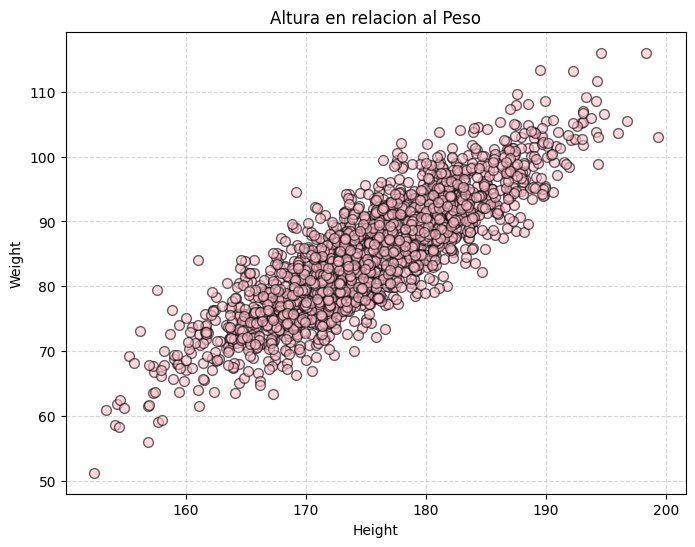

In [47]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(train_small['Height_cm'], train_small['Weight_kg'], color='pink', alpha=0.6, edgecolor='black', s=50)
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Altura en relacion al Peso')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


### Creacion del Modelo de Regresion
* Entrenamos el modelo siendo x = `Height` y y=`Weight`

In [48]:
reg = LinearRegression()
reg.fit(train_small[['Height_cm']], train_small[['Weight_kg']])

LinearRegression()

### Realizamos las Predicciones

In [52]:
train_small['Weight_kg'].max()

np.float64(116.05755799056705)

In [53]:
prediccionPeso = (reg.predict([[160]]))
print(f'Predicción para Height = 160: {prediccionPeso[0]}')

Predicción para Height = 160: [68.65025739]


c:\Users\IPF-2025\Desktop\04-06\env\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [67]:
prediccionPeso2 = (reg.predict([[180]]))
print(f'Predicción para Height = 180: {prediccionPeso2[0]}')


Predicción para Height = 180: [89.87355715]


c:\Users\IPF-2025\Desktop\04-06\env\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


### Guardamos el Modelo

In [68]:
import joblib
joblib.dump(reg, 'weightheight_reg_model.pkl')

['weightheight_reg_model.pkl']

### Cargamos el modelo

In [70]:
modelo = joblib.load('weightheight_reg_model.pkl')
modelo.predict([[190]])

c:\Users\IPF-2025\Desktop\04-06\env\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[100.48520703]])

### Gráfico de visualización de comparacion entre los datos de entrenamiento con los resultados predecidos.

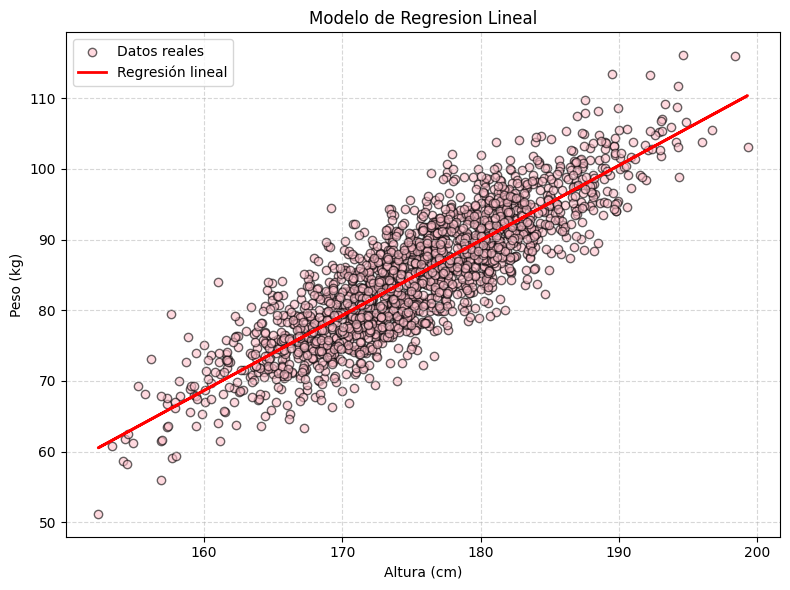

In [75]:

plt.figure(figsize=(8,6))
plt.scatter(train_small['Height_cm'], train_small['Weight_kg'], color='pink', label='Datos reales', alpha=0.6, edgecolor='k')
plt.plot(train_small['Height_cm'], reg.predict(train_small[['Height_cm']]), color='red', linewidth=2, label='Regresión lineal')
plt.xlabel('Altura (cm)')
plt.ylabel('Peso (kg)')
plt.title('Modelo de Regresion Lineal')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


